In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X_train=[[6],[8],[10],[14],[18]]
y_train=[[7],[9],[13],[17.5],[18]]
X_test=[[8],[9],[11],[16],[12]]
y_test=[[11],[8.5],[15],[18],[11]]
model=LinearRegression()
lm=model.fit(X_train,y_train)
y_pred=lm.predict(X_test)
mean_squared_error(y_test, y_pred)


print('R-squared:%.4f'%model.score(X_test,y_test))
print('MSE:%.4f'%mean_squared_error(y_test, y_pred))
#The coefficients
print('Coefficients:/n',model.coef_)
#The intercept
print('Intercept:',model.intercept_)

R-squared:0.6620
MSE:3.8396
Coefficients:/n [[0.9762931]]
Intercept: [1.96551724]


In [2]:
#from sklearn import cross_validation
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
import numpy as np
import pylab as pl

In [2]:
from sklearn.model_selection import cross_val_score   
from sklearn.datasets import load_boston
boston = load_boston()

In [4]:
type(boston)

sklearn.utils.Bunch

In [3]:
boston.feature_names   #Unicode string

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [4]:
print(boston.data.shape)
print(boston.target.shape)

(506, 13)
(506,)


In [5]:
type(boston.data)

numpy.ndarray

In [6]:
from scipy import stats

np.set_printoptions(precision=2)

t1=stats.describe(boston.data)

# output
print(t1)

NameError: name 'np' is not defined

In [9]:
#boston.target

(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <a list of 10 Patch objects>)

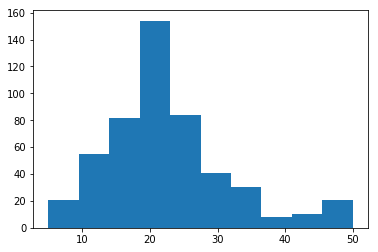

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(boston.target)

#counts, bins, bars = plt.hist(boston.target,)


In [11]:
np.set_printoptions(precision=2, linewidth=120,suppress=True, edgeitems=4)

In [8]:
# In order to do multiple regression we need to add a column of 1s for x0

x =boston.data
y = boston.target


In [9]:

# First 10 elements of the data
print(x[:10])

[[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 7.1850e+00
  6.1100e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9283e+02
  4.0300e+00]
 [3.2370e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 6.9980e+00
  4.5800e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9463e+02
  2.9400e+00]
 [6.9050e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 7.1470e+00
  5.4200e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9690e+02
  5.3300e+00]
 [2.9850e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 6.4300e+00
  5.8700e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9412e+02
  5.2100e+00]
 [8.8290e-02 1.2500e+01 7.8700e+00 0.0000e+00 5.2400e-01 6.0120e+00
  6.6600e+01 5.5605e+00 5.0000e+

In [10]:
# First 10 elements of the response variable
print (y[:10])

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9]


In [11]:
from sklearn import metrics

#comparisons across methods
a = 0.3
for name,method in [
        ('Linear regression', LinearRegression()),
        ('Lasso', Lasso(fit_intercept=True, alpha=a)),
        ('Ridge', Ridge(fit_intercept=True, alpha=a)),
        ('Elastic-net', ElasticNet(fit_intercept=True,alpha=a))
        ]:
    
     
    k_fold = KFold(10)
     
  
    for k, (train, test) in enumerate(k_fold.split(x, y)):
        method.fit(x[train],y[train])
        py = method.predict(x[test])
        rsq=metrics.r2_score(y[test],py,multioutput='raw_values')
        mse= metrics.mean_squared_error(y[test],py) 
    cvrsq=np.average(rsq)
    cvmse=np.average(mse)
        
        
    print('Method: %s' %name)
    print('RScore 10fold avg  : %.4f' %cvrsq)
    print('MSE on 10-fold CV: %.4f' %cvmse)
    print('Coefficients:n',method.coef_)
    print('Intercept:n',method.intercept_)
    print ("\n")


NameError: name 'Lasso' is not defined

In [20]:
mod=LinearRegression()
model=mod.fit(x,y)
type(model)

sklearn.linear_model.base.LinearRegression

In [21]:
from sklearn.externals import joblib 
#  Save model for future use
joblib.dump(model, 'Boston_regressor.pkl')
# To load: clf2 = joblib.load('rf_regressor.pkl')

['Boston_regressor.pkl']

In [22]:
lm=LinearRegression()

lm.get_params

<bound method BaseEstimator.get_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)>

In [23]:
model=Ridge()
model.get_params

<bound method BaseEstimator.get_params of Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)>